In [65]:
import pandas as pd

cycling = pd.read_csv("../datasets/bike_rides.csv", index_col=0,
                      parse_dates=True)
cycling.index.name = ""
target_name = "power"
data, target = cycling.drop(columns=target_name), cycling[target_name]
data

,heart-rate,cadence,speed,acceleration,slope
,,,,,
2020-08-18 14:43:19,102.0,64.0,4.325,0.0880,-0.033870
2020-08-18 14:43:20,103.0,64.0,4.336,0.0842,-0.033571
2020-08-18 14:43:21,105.0,66.0,4.409,0.0234,-0.033223
2020-08-18 14:43:22,106.0,66.0,4.445,0.0016,-0.032908
2020-08-18 14:43:23,106.0,67.0,4.441,0.1144,0.000000
...,...,...,...,...,...
2020-09-13 14:55:57,130.0,0.0,1.054,0.0234,0.000000
2020-09-13 14:55:58,130.0,0.0,0.829,0.0258,0.000000
2020-09-13 14:55:59,129.0,0.0,0.616,-0.1686,0.000000


In [66]:
# Q1-2-3

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit, cross_validate
import numpy as np 

vd_cube = data["speed"]**3
vd = data["speed"]
sin_speed = np.sin(np.arctan(data["slope"])) * vd 
a_vd = data["acceleration"].clip(lower=0) * vd

# print(sin_speed.mean())

data_model = pd.concat([vd_cube, vd, sin_speed, a_vd], axis=1)
data_model.columns = ['vd_cube', 'vd', 'sin_speed', 'a_vd']

cv = ShuffleSplit(n_splits=4)

pipeline_ridge = make_pipeline(
    StandardScaler(), RidgeCV()
)

cv_results_ridge = cross_validate(pipeline_ridge, data_model, target, cv=cv, scoring="neg_mean_absolute_error", return_estimator=True, return_train_score=True)

# cv_results_ridge["test_score"].mean()

for est in cv_results_ridge["estimator"]:
    ridge_est = est[1]
    print(vars(ridge_est))


{'alphas': (0.1, 1.0, 10.0), 'fit_intercept': True, 'scoring': None, 'cv': None, 'gcv_mode': None, 'store_cv_values': False, 'alpha_per_target': False, 'alpha_': 10.0, 'best_score_': -9444.21181136815, 'coef_': array([ 5.95003402, 32.99656777, 80.71527672, 10.8328157 ]), 'intercept_': 192.6028378064366, 'n_features_in_': 4}
{'alphas': (0.1, 1.0, 10.0), 'fit_intercept': True, 'scoring': None, 'cv': None, 'gcv_mode': None, 'store_cv_values': False, 'alpha_per_target': False, 'alpha_': 10.0, 'best_score_': -9439.482091637448, 'coef_': array([ 6.28869418, 32.5162414 , 80.95799084, 11.19962511]), 'intercept_': 192.73576739862904, 'n_features_in_': 4}
{'alphas': (0.1, 1.0, 10.0), 'fit_intercept': True, 'scoring': None, 'cv': None, 'gcv_mode': None, 'store_cv_values': False, 'alpha_per_target': False, 'alpha_': 10.0, 'best_score_': -9443.361844726263, 'coef_': array([ 4.93318139, 33.60234654, 80.46092694, 11.1130693 ]), 'intercept_': 192.77320785407224, 'n_features_in_': 4}
{'alphas': (0.1, 1

In [67]:
# Q4 
from sklearn.ensemble import HistGradientBoostingRegressor

tree = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True)

cv_results_tree = cross_validate(tree, data, target, cv=cv, scoring="neg_mean_absolute_error", return_estimator=True, return_train_score=True)


cv_results_tree["test_score"].mean()

-44.68084127600724

In [68]:
# Q5 : check the overfitting or underfitting thanks to the comparison between train and test

print(cv_results_tree["train_score"])
print(cv_results_tree["test_score"])
print(cv_results_ridge["train_score"])
print(cv_results_ridge["test_score"])

[-38.44263577 -41.02570242 -40.33084029 -40.17230498]
[-45.01553478 -44.97261437 -43.74211767 -44.99309827]
[-72.4849819  -72.45024617 -72.48371866 -72.33970975]
[-72.01501745 -72.66303808 -72.26852376 -73.60807324]


In [69]:
#Q6: dateTimeIndex type, to access the day df.index.date and the time df.index.time
#or datesDay = data.index.strftime('%Y-%m-%d')
# np.unique(cycling.index.date)

datesDay = set(data.index.date)
print(datesDay)


{datetime.date(2020, 8, 26), datetime.date(2020, 9, 13), datetime.date(2020, 8, 20), datetime.date(2020, 8, 18)}


In [70]:
# Q7

from sklearn.model_selection import LeaveOneGroupOut

group = pd.factorize(data.index.date)[0]

cv = LeaveOneGroupOut()

cv_results_tree_group = cross_validate(tree, data, target, cv=cv, groups=group, scoring="neg_mean_absolute_error", return_estimator=True, return_train_score=True)

cv_results_ridge_group = cross_validate(pipeline_ridge, data_model, target, cv=cv, groups=group, scoring="neg_mean_absolute_error", return_estimator=True, return_train_score=True)


print(cv_results_tree_group["train_score"])
print(cv_results_tree_group["test_score"])
print(cv_results_ridge_group["train_score"])
print(cv_results_ridge_group["test_score"])

[-39.38753214 -39.33827014 -38.15664724 -39.02394945]
[-47.77651138 -48.28789066 -53.89426689 -50.70560826]
[-72.4317474  -72.28702403 -68.96505889 -75.31150408]
[-72.44062969 -73.32064854 -81.30750799 -64.99031478]


In [71]:
#Q8-9-10
print(cv_results_ridge["train_score"].mean())
print(cv_results_ridge["test_score"].mean())
print(cv_results_ridge_group["train_score"].mean())
print(cv_results_ridge_group["test_score"].mean())

print(cv_results_tree["train_score"].mean())
print(cv_results_tree["test_score"].mean())
print(cv_results_tree_group["train_score"].mean())
print(cv_results_tree_group["test_score"].mean())

print(cv_results_ridge["train_score"].std())
print(cv_results_ridge["test_score"].std())
print(cv_results_ridge_group["train_score"].std())
print(cv_results_ridge_group["test_score"].std())

print(cv_results_tree["train_score"].std())
print(cv_results_tree["test_score"].std())
print(cv_results_tree_group["train_score"].std())
print(cv_results_tree_group["test_score"].std())

-72.43966412084397
-72.63866313167242
-72.2488335996342
-73.01477525166464
-39.992870866615334
-44.68084127600724
-38.976599742275035
-50.16606929868582
0.05936615012149765
0.60545173255513
2.247111636088286
5.77893986171206
0.9508403906900218
0.5421848674838627
0.4935167219964314
2.4201292121924336


In [72]:
#Q11
import seaborn as sns 
import matplotlib.pyplot as plt

cv = LeaveOneGroupOut()
train_indices, test_indices = list(cv.split(data, target, groups=group))[0]

data_linear_model_train = data_model.iloc[train_indices]
data_linear_model_test = data_model.iloc[test_indices]

data_train = data.iloc[train_indices]
data_test = data.iloc[test_indices]

target_train = target.iloc[train_indices]
target_test = target.iloc[test_indices]

# cv_results_tree_group = cross_validate(tree, data_train, target_train, cv=cv, groups=group, scoring="neg_mean_absolute_error", return_estimator=True, return_train_score=True)

# cv_results_ridge_group = cross_validate(pipeline_ridge, data_linear_model_train, target_train, cv=cv, groups=group, scoring="neg_mean_absolute_error", return_estimator=True, return_train_score=True)



pipeline_ridge = make_pipeline(
    StandardScaler(), RidgeCV()
)

tree = HistGradientBoostingRegressor(max_iter=1000, early_stopping=True)


tree.fit(data_train, target_train)

results_tree = tree.predict(data_test)

pipeline_ridge.fit(data_linear_model_train, target_train)

results_ridge = pipeline_ridge.predict(data_linear_model_test)





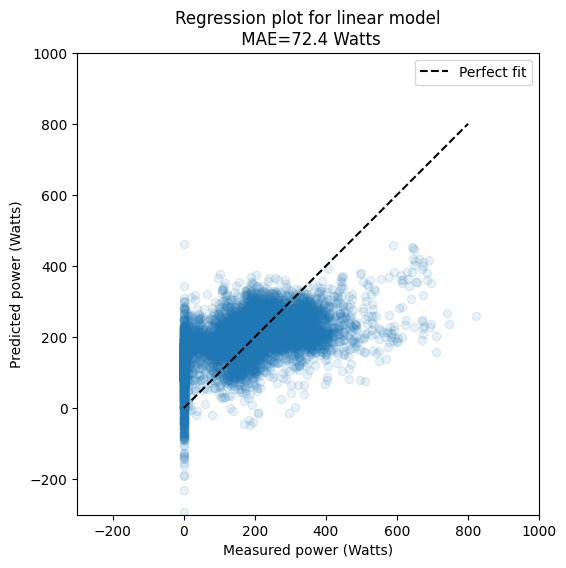

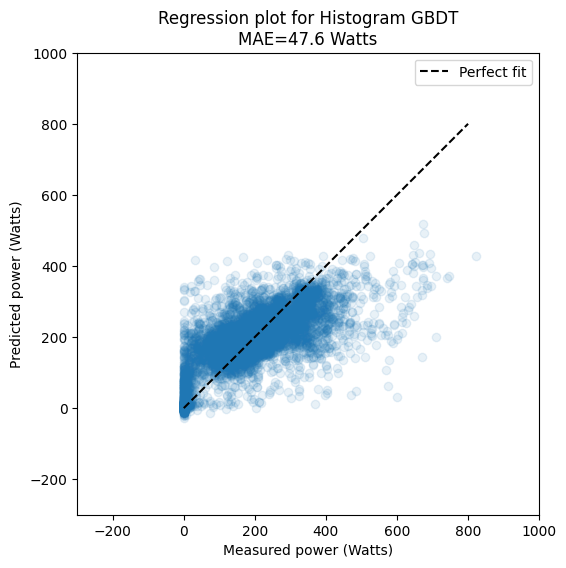

In [78]:
from sklearn.metrics import mean_absolute_error

# dico_linear = {"true target": target_test, "predicted target": results_ridge}
# dico_tree = {"true target": target_test, "predicted target": results_tree}

pipeline_ridge.fit(data_linear_model_train, target_train)
target_predicted_linear_model = pipeline_ridge.predict(data_linear_model_test)

tree.fit(data_train, target_train)
target_predicted_hgbdt = tree.predict(data_test)

# compute errors
mae_linear_model = mean_absolute_error(target_test,
                                       target_predicted_linear_model)
mae_hgbdt = mean_absolute_error(target_test, target_predicted_hgbdt)

# make regression plots
plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_predicted_linear_model, alpha=0.1)
plt.plot([0, 800], [0, 800], color="black", linestyle="--",
         label="Perfect fit")
plt.legend()
plt.axis("square")
plt.xlabel("Measured power (Watts)")
plt.ylabel("Predicted power (Watts)")
plt.xlim(-300, 1000)
plt.ylim(-300, 1000)
_ = plt.title(f"Regression plot for linear model\n "
              f"MAE={mae_linear_model:.1f} Watts")

plt.figure(figsize=(6, 6))
plt.scatter(target_test, target_predicted_hgbdt, alpha=0.1)
plt.plot([0, 800], [0, 800], color="black", linestyle="--",
         label="Perfect fit")
plt.legend()
plt.axis("square")
plt.xlabel("Measured power (Watts)")
plt.ylabel("Predicted power (Watts)")
plt.xlim(-300, 1000)
plt.ylim(-300, 1000)
_ = plt.title(f"Regression plot for Histogram GBDT\n"
              f"MAE={mae_hgbdt:.1f} Watts")


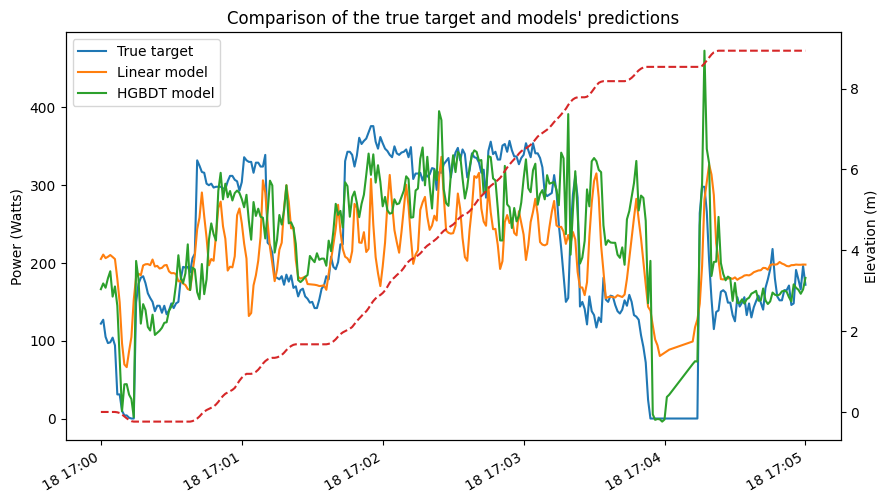

In [82]:
# Q12

time_slice = slice("2020-08-18 17:00:00", "2020-08-18 17:05:00")

data_test_linear_model_subset = data_linear_model_test[time_slice]
data_test_subset = data_test[time_slice]
target_test_subset = target_test[time_slice]

pipeline_ridge.fit(data_linear_model_train, target_train)
target_predicted_linear_model = pipeline_ridge.predict(data_test_linear_model_subset)

tree.fit(data_train, target_train)
target_predicted_hgbdt = tree.predict(data_test_subset)


# make the plot
ax = target_test_subset.plot(label="True target", figsize=(10, 6))
ax.plot(target_test_subset.index, target_predicted_linear_model,
        label="Linear model")
ax.plot(target_test_subset.index, target_predicted_hgbdt, label="HGBDT model")
ax.set_ylabel("Power (Watts)")
plt.legend()

# In addition, we add the elevation to show that the data were acquired in a
# hill. This part of the answer was optional.
ax_elevation = ax.twinx()
ax_elevation.plot(target_test_subset.index, data_test_subset["slope"].cumsum(),
                  color="tab:red", linestyle="--")
ax_elevation.set_ylabel("Elevation (m)")

_ = plt.title("Comparison of the true target and models' predictions")